## Correlation Between Variables

Let's track the correlation between the two variables. First, let's load our data.

In [5]:
import xarray as xarr

data = xarr.open_dataset("./data/clipped_hourly_pressure_1988.nc")

Let's continue by defining the variables we need.

In [6]:
temp_data = data["t"].mean(dim=["latitude","longitude"])
clwc_data = data["clwc"].mean(dim=["latitude","longitude"])

Using the following [reference](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.polyfit.html), we can now look to define both a scatter plot and an appropiate fit line.

In [7]:
import matplotlib.pyplot as plot

plot.figure(figsize=(12, 8))

# Use DataArray's polyfit method
coeffs = clwc_data.polyfit(dim='valid_time', deg=1, skipna=True)
fit_line = xarr.polyval(temp_data, coeffs.polyfit_coefficients)

<Figure size 1200x800 with 0 Axes>

Finally, we can plot and save the figure (note: alpha is transparency of elements).

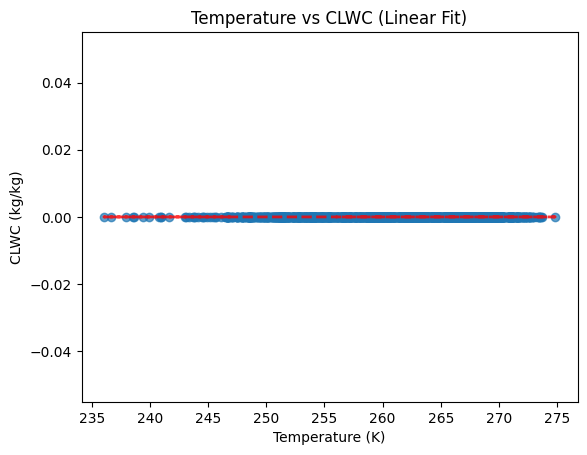

In [8]:
# Plot the scatter, fit line
plot.plot(temp_data.values, fit_line.values, "r--", alpha=0.8, linewidth=2)
plot.scatter(temp_data.values, clwc_data.values, alpha=0.7)

# labels, save, show
plot.xlabel('Temperature (K)')
plot.ylabel('CLWC (kg/kg)')
plot.title('Temperature vs CLWC (Linear Fit)')
plot.savefig("./plots/Temperature_CLWC_Correlation.png")
plot.show()